In [ ]:
"""import pandas as pd

# 读取CSV文件
df = pd.read_csv('./data/US_volleyball_athletes.csv')

# 奖牌赋分
medal_scores = {'Gold': 5, 'Silver': 3, 'Bronze': 1, 'No medal': 0}
df['Score'] = df['Medal'].map(medal_scores)

# 初始化Scoring列为0
df['Scoring'] = 0

# 按年份和运动员计算得分
for year in df['Year'].unique():
    if year == 1984:
        # 1984年：直接使用当年的分数
        df.loc[df['Year'] == year, 'Scoring'] = df.loc[df['Year'] == year, 'Score']
    elif year == 1988:
        # 1988年：1984年 + 1988年
        for name in df['Name'].unique():
            score_1984 = df[(df['Name'] == name) & (df['Year'] == 1984)]['Score'].sum()
            score_1988 = df[(df['Name'] == name) & (df['Year'] == 1988)]['Score'].sum()
            df.loc[(df['Name'] == name) & (df['Year'] == 1988), 'Scoring'] = score_1984 + score_1988
    elif year == 1992:
        # 1992年：1984年 + 1988年 + 1992年
        for name in df['Name'].unique():
            score_1984 = df[(df['Name'] == name) & (df['Year'] == 1984)]['Score'].sum()
            score_1988 = df[(df['Name'] == name) & (df['Year'] == 1988)]['Score'].sum()
            score_1992 = df[(df['Name'] == name) & (df['Year'] == 1992)]['Score'].sum()
            df.loc[(df['Name'] == name) & (df['Year'] == 1992), 'Scoring'] = score_1984 + score_1988 + score_1992
    else:
        # 1996年及以后：前三年（滑动窗口）
        for name in df['Name'].unique():
            score_prev1 = df[(df['Name'] == name) & (df['Year'] == year - 4)]['Score'].sum()
            score_prev2 = df[(df['Name'] == name) & (df['Year'] == year - 8)]['Score'].sum()
            score_current = df[(df['Name'] == name) & (df['Year'] == year)]['Score'].sum()
            df.loc[(df['Name'] == name) & (df['Year'] == year), 'Scoring'] = score_prev1 + score_prev2 + score_current

# 将ExperienceScoring列的数据类型转换为float64
df['ExperienceScoring'] = df['ExperienceScoring'].astype(float)

# 按运动员和年份计算ExperienceScoring
for name in df['Name'].unique():
    # 获取该运动员的所有参赛记录，按年份排序
    athlete_df = df[df['Name'] == name].sort_values(by='Year')
    
    # 初始化参赛次数
    experience_count = 0
    
    # 遍历该运动员的每一条记录
    for index, row in athlete_df.iterrows():
        experience_count += 1  # 每次参赛加1
        df.loc[index, 'ExperienceScoring'] = experience_count * 0.5  # 计算ExperienceScoring

# 删除临时列Score
df.drop(columns=['Score'], inplace=True)

# 输出结果
print(df)

# 保存更新后的数据到原文件（如果需要）
df.to_csv('./data/US_volleyball_athletes_scores.csv', index=False)"""

In [1]:
import pandas as pd

# 读取数据
data = pd.read_csv('./data/CoachEffect/Question2_ToPredict.csv')

# 按 Name 和 Year 排序，确保数据按年份升序排列
data = data.sort_values(by=['Name', 'Year'])

# 使用 shift 方法将上一届的 Scoring_Current 赋值给下一届的 Scoring_Last4
data['Scoring_Last4'] = data.groupby('Name')['Scoring_Current'].shift()

# 将所有缺失值（空格）赋值为 0
data = data.fillna(0)

"""# 按照 Name 和 Year 分组，对数值列求和
# 假设需要求和的列是 Scoring_Current 和 Scoring_Last4
data = data.groupby(['Name', 'Year'], as_index=False).agg({
    'Scoring_Current': 'sum',  # 对 Scoring_Current 求和
    'Scoring_Last4': 'sum',    # 对 Scoring_Last4 求和
    'NOC': 'first',
    'isCoached': 'first',
    'ExperienceScoring': 'first'
})"""

# 导出结果到新的 CSV 文件
data.to_csv('./data/TemperScores_Processed.csv', index=False)

print("数据处理完成，结果已导出到 './data/TemperScores_Processed.csv'")

KeyError: 'Name'

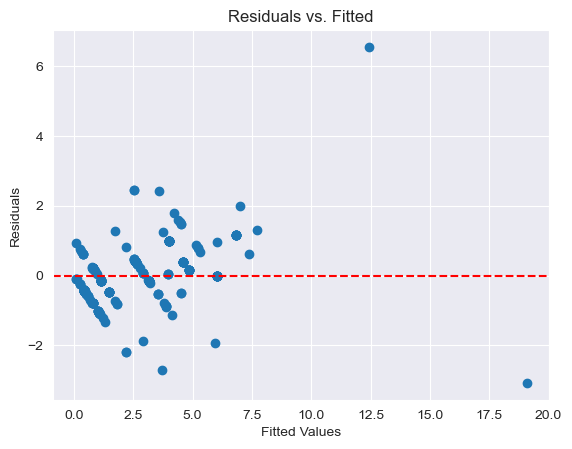

In [15]:
import pandas as pd

# 读取预测结果 CSV 文件
df_predictions = pd.read_csv('Predicted_Results.csv')

# 按照 Country 和 Sport 分组，计算 Original_Prediction 的求和
df_grouped = df_predictions.groupby(['Country', 'Sport'], as_index=False)['Original_Prediction'].sum()

# 保存结果到新的 CSV 文件
df_grouped.to_csv('Q2_Prediction.csv', index=False)

print("Grouped prediction results saved to 'Grouped_Predicted_Results.csv'.")